# Numerical Differentiation
Consider a domain
\begin{align*}
    x\in[a,b),
\end{align*}
where $b-a=L$.

Discretising the domain into $N$ points yields $\textbf{X}$, where
\begin{align*}
    x_i &= i\Delta x, \qquad i=0,1,2,\dots,N-1
\end{align*}
and the spacing $\Delta x=L/N$.

For demonstration, consider a function
\begin{align*}
    f(x_i) &= e^{-5{x_i}^2},
\end{align*}
where
\begin{align*}
    \frac{\mathrm{d}}{\mathrm{d}x}f(x_i) &= -10x_ie^{-5{x_i}^2}.
\end{align*}


In [71]:
import numpy as np
from numpy import fft as fft
import matplotlib.pyplot as plt

In [72]:
N = 2**8
a = -10
b = 10
L = b-a
X = np.linspace(a,b,N+1)[0:N]
def f(x):
    y = np.exp(-5*x**2)
    return y
Y = f(X)
YDiffAna = -10*X*Y

## Finite differences
The Taylor's expansion of $f(x+\Delta x)$ is:
\begin{align*}
    f(x+\Delta x) &= f(x) + f'(x)\Delta x + \frac{f''(x)}{2}\Delta x^2 + \frac{f^{(3)}(x)}{3!}\Delta x^3+\cdots
\end{align*}
### FD1
FD1 is given by rearranging Taylor's expansion of $f(x+\Delta x)$:
\begin{align*}
    \left(\frac{\mathrm{d}f(x)}{\mathrm{d}x}\right)_\mathrm{FD1} 
    &= \frac{1}{\Delta x}\left(f(x+\Delta x)-f(x)\right) \\
    f'_\mathrm{FD1}(x_i) 
    &= \frac{1}{\Delta x}\left(f(x_{i+1})-f(x_i)\right).
\end{align*}
With the periodic BC, FD1 is

In [73]:
def NDiffFd1(X,Y):
    Dx = X[1]-X[0]
    Yp1 = np.append(Y[1:],Y[0])
    Yd = (Yp1-Y)/Dx;
    return Yd

YDiffFd1 = NDiffFd1(X,Y)

### FD2

In [74]:
def NDiffFd2(X,Y):
    Dx = X[1]-X[0]
    Yp1 = np.append(Y[1:],Y[0])
    Yn1 = np.append(Y[-1],Y[:-1])
    Yd = (Yp1-Yn1)/(2*Dx);
    return Yd

YDiffFd2 = NDiffFd2(X,Y)

### FD4

In [75]:
def NDiffFd4(X,Y):
    Dx = X[1]-X[0]
    Yp1 = np.append(Y[1:],Y[0])
    Yn1 = np.append(Y[-1],Y[:-1])
    Yp2 = np.append(Y[2:],Y[0:2])
    Yn2 = np.append(Y[-2:],Y[:-2])
    Yd = (Yp1-Yn1)*(2/3/Dx)-(Yp2-Yn2)*(1/12/Dx)
    return Yd

YDiffFd4 = NDiffFd4(X,Y)

### FD6

In [76]:
def NDiffFd6(X,Y):
    Dx = X[1]-X[0]
    Yp1 = np.append(Y[1:],Y[0])
    Yn1 = np.append(Y[-1],Y[:-1])
    Yp2 = np.append(Y[2:],Y[0:2])
    Yn2 = np.append(Y[-2:],Y[:-2])
    Yp3 = np.append(Y[3:],Y[0:3])
    Yn3 = np.append(Y[-3:],Y[:-3])
    Yd = (Yp1-Yn1)*(2/3/Dx)-(Yp2-Yn2)*(1/12/Dx)
    return Yd

YDiffFd6 = NDiffFd6(X,Y)

## Spectral method
### FFT

In [77]:
def NDiffFft(X,Y,od):
    # if ~exist('order','var')
    #      od = 1;
    N = len(X)
    L = X[-1]-X[0]+X[1]-X[0]
    if np.mod(len(Y),2) == 0:
        omega = fft.fftshift(1j*(2*np.pi/L)*np.arange(-(N/2),(N/2),1))
    else:
        omega = fft.fftshift(1j*(2*np.pi/L)*np.arange(-np.floor(N/2),np.floor(N/2)+1,1))
    YHat  = fft.fft(Y)
    YdHat = omega**od*YHat
    Yd    = np.real(fft.ifft(YdHat))
    return Yd

YDiffFft = NDiffFft(X,Y,1)

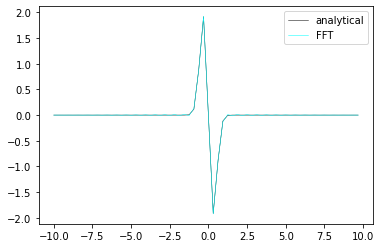

In [78]:
plt.plot(X,YDiffAna,linewidth=0.5,color='k',label='analytical')
plt.plot(X,YDiffFd1,linewidth=0.5,color='b',label='FD1')
plt.plot(X,YDiffFd2,linewidth=0.5,color='r',label='FD2')
plt.plot(X,YDiffFd4,linewidth=0.5,color='g',label='FD4')
plt.plot(X,YDiffFft,linewidth=0.5,color='cyan',label='FFT')
plt.legend()

In [79]:
print(np.shape(YDiffFft))

(64,)
